# Euclidean vs. Cosine Distance
https://cmry.github.io/notes/euclidean-v-cosine

In [1]:
import numpy as np

X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])

In [2]:
import pandas as pd

df = pd.DataFrame(X, columns=['weight', 'length', 'label'])
df

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
2,8.0,8.3,2.0
3,6.3,5.4,1.0
4,1.3,2.7,0.0
5,2.3,3.1,0.0
6,6.6,6.0,1.0
7,6.5,6.4,1.0
8,6.3,5.8,1.0
9,9.5,9.9,2.0


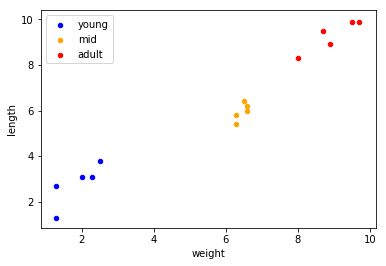

In [3]:
%matplotlib inline

ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax

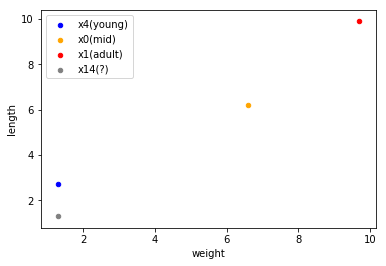

In [4]:
df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='x4(young)')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='x0(mid)', ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='x1(adult)', ax=ax)
ax = df3.plot.scatter(x='weight', y='length', c='gray', label='x14(?)', ax=ax)
ax

In [5]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

$\sqrt{\sum^n_{i=1} (x_i - y_i)^2}$

In [6]:
x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
x14 = X[14][:-1]
print(" x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nx14:", x14)

 x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
x14: [1.3 1.3]


In [7]:
print(" x14 and x0:", euclidean_distance(x14, x0), "\n",
      "x14 and x1:", euclidean_distance(x14, x1), "\n",
      "x14 and x4:", euclidean_distance(x14, x4))

 x14 and x0: 7.218032973047436 
 x14 and x1: 12.021647141718974 
 x14 and x4: 1.4000000000000001


In [8]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

$\frac{x \bullet y}{ \sqrt{x \bullet x} \sqrt{y \bullet y}}$

In [9]:
print(" x14 and x0:", cosine_similarity(x14, x0), "\n",
      "x14 and x1:", cosine_similarity(x14, x1), "\n",
      "x14 and x4:", cosine_similarity(x14, x4))

 x14 and x0: 0.9995120760870786 
 x14 and x1: 0.9999479424242859 
 x14 and x4: 0.9438583563660174


While cosine looks at the angle between vectors (thus not taking into regard their weight or magnitude), euclidean distance is similar to using a ruler to actually measure the distance.

In [10]:
def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

def l2_normalize(v):
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

# Cosine Similarity in Action

In [11]:
import wikipedia

q1 = wikipedia.page('Machine Learning')
q2 = wikipedia.page('Artifical Intelligence')
q3 = wikipedia.page('Soccer')
q4 = wikipedia.page('Tennis')

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = np.array(cv.fit_transform([q1.content, q2.content, q3.content, q4.content]).todense())

In [13]:
print("ML \t", len(q1.content.split()), "\n"
      "AI \t", len(q2.content.split()), "\n"
      "soccer \t", len(q3.content.split()), "\n"
      "tennis \t", len(q4.content.split()))

ML 	 4048 
AI 	 13742 
soccer 	 6470 
tennis 	 9736


In [14]:
q1.content[:100]

'Machine learning is a field of computer science that often uses statistical techniques to give compu'

In [15]:
q1.content.split()[:10]

['Machine',
 'learning',
 'is',
 'a',
 'field',
 'of',
 'computer',
 'science',
 'that',
 'often']

In [16]:
X[0][:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [17]:
X[0].shape

(5484,)

In [18]:
print("ML - AI \t", euclidean_distance(X[0], X[1]), "\n"
      "ML - soccer \t", euclidean_distance(X[0], X[2]), "\n"
      "ML - tennis \t", euclidean_distance(X[0], X[3]))

ML - AI 	 846.53411035823 
ML - soccer 	 479.75827246645787 
ML - tennis 	 789.7069076562519


In [19]:
print("ML - AI \t", cosine_similarity(X[0], X[1]), "\n"
      "ML - soccer \t", cosine_similarity(X[0], X[2]), "\n"
      "ML - tennis \t", cosine_similarity(X[0], X[3]))

ML - AI 	 0.8887965704386804 
ML - soccer 	 0.7839297821715802 
ML - tennis 	 0.7935675914311315


In [20]:
print("ML - AI \t", euclidean_distance(l1_normalize(X[0]), l1_normalize(X[1])), "\n"
      "ML - soccer \t", euclidean_distance(l1_normalize(X[0]), l1_normalize(X[2])), "\n"
      "ML - tennis \t", euclidean_distance(l1_normalize(X[0]), l1_normalize(X[3])))

ML - AI 	 0.04436436625297075 
ML - soccer 	 0.07080951008028483 
ML - tennis 	 0.06851803100158377


In [21]:
print("ML - AI \t", euclidean_distance(l2_normalize(X[0]), l2_normalize(X[1])), "\n"
      "ML - soccer \t", euclidean_distance(l2_normalize(X[0]), l2_normalize(X[2])), "\n"
      "ML - tennis \t", euclidean_distance(l2_normalize(X[0]), l2_normalize(X[3])))

ML - AI 	 0.47160031713585515 
ML - soccer 	 0.6573738933490131 
ML - tennis 	 0.6425455759226243


# Categorize a Tweet

In [22]:
ml_tweet = "New research release: overcoming many of Reinforcement Learning's limitations with Evolution Strategies."
x = np.array(cv.transform([ml_tweet]).todense())[0]

In [23]:
print("tweet - ML \t", euclidean_distance(x[0], X[0]), "\n"
      "tweet - AI \t", euclidean_distance(x[0], X[1]), "\n"
      "tweet - soccer \t", euclidean_distance(x[0], X[2]), "\n"
      "tweet - tennis \t", euclidean_distance(x[0], X[3]))

tweet - ML 	 373.90506816570434 
tweet - AI 	 1161.3341465745334 
tweet - soccer 	 712.9719489573205 
tweet - tennis 	 1052.9425435416692


In [24]:
print("tweet - ML \t", cosine_similarity(x, X[0]), "\n"
      "tweet - AI \t", cosine_similarity(x, X[1]), "\n"
      "tweet - soccer \t", cosine_similarity(x, X[2]), "\n"
      "tweet - tennis \t", cosine_similarity(x, X[3]))

tweet - ML 	 0.2613347291026786 
tweet - AI 	 0.19333084671126158 
tweet - soccer 	 0.1197543563241326 
tweet - tennis 	 0.11622680287651725


In [25]:
so_tweet = "#LegendsDownUnder The Reds are out for the warm up at the @nibStadium. Not long now until kick-off in Perth."
x2 = np.array(cv.transform([so_tweet]).todense())[0]

In [26]:
print("tweet - ML \t", euclidean_distance(x2, X[0]), "\n"
      "tweet - AI \t", euclidean_distance(x2, X[1]), "\n"
      "tweet - soccer \t", euclidean_distance(x2, X[2]), "\n"
      "tweet - tennis \t", euclidean_distance(x2, X[3]))

tweet - ML 	 371.8669116767449 
tweet - AI 	 1159.1397672412072 
tweet - soccer 	 710.1035135809426 
tweet - tennis 	 1050.1485609188826


In [27]:
print("tweet - ML \t", cosine_similarity(x2, X[0]), "\n"
      "tweet - AI \t", cosine_similarity(x2, X[1]), "\n"
      "tweet - soccer \t", cosine_similarity(x2, X[2]), "\n"
      "tweet - tennis \t", cosine_similarity(x2, X[3]))

tweet - ML 	 0.4396242958582417 
tweet - AI 	 0.46942065152331963 
tweet - soccer 	 0.6136116162795926 
tweet - tennis 	 0.5971160690477066
